In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
from scipy import signal
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
%matplotlib inline

In [2]:
def Mp3ToWav(ifilename, ofilename):
    song = AudioSegment.from_mp3(ifilename)
    song.export(ofilename , format="wav")
    

In [8]:
def CrossCorrelation(x, y):
    N = len(x)+len(y)-1
    zpad_x = np.append(x,np.array([0 for i in range(N-len(x))]))
    zpad_y = np.append(y,np.array([0 for i in range(N-len(y))]))
    fft_x = np.fft.fft(x,N)
    fft_y = np.fft.fft(y,N)
    fft_s = fft_x*np.conjugate(fft_y)
    s = np.real(np.fft.ifft(fft_s))
    return np.append(s[int(N/2)+1:],s[:int(N/2)+1])

"""
Test AutoCorrelation function
"""
x = [-1,2,1]
y = [-1,2,1]
s = CrossCorrelation(x,y)
ans = np.correlate(x, y, 'full')
print(s)
print(ans)

[-1.00000000e+00  2.42931577e-17  6.00000000e+00  2.42931577e-17
 -1.00000000e+00]
[-1  0  6  0 -1]


In [9]:
def DisplayWave(filename, channel, lbound, rbound):
    '''
    channel = 2 : both channels
    channel = 0 : left channel
    channel = 1 : right channel
    '''
    sRate, data = wavfile.read(filename)
    if channel < 2:
        samples = data[lbound: rbound, channel]
    else:
        samples = data[lbound: rbound]
    length = samples.shape[0]/sRate
    print(samples.shape)
    print('length:{}s'.format(length))
    print('SampleRate:{}Hz'.format(sRate))
    time = np.linspace(0., length, samples.shape[0])
    if channel == 2:
        plt.plot(time, samples[:,0], label="Left channel")
        plt.plot(time, samples[:,1], label="Right channel")
    elif channel == 1:
        plt.plot(time, samples, label="Right channel")
    else:
        plt.plot(time, samples, label="Left channel")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()
    return samples

In [47]:
def MakeSpectrumW(t_samples):
    t_sample_rfft = np.fft.rfft(t_samples, 512)
    print(len(t_sample_rfft))
    w = np.linspace(0, np.pi, len(t_sample_rfft))
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.plot(w,20*np.log10(np.absolute(t_sample_rfft)))
    plt.xlabel('$\omega$')
    plt.ylabel('Magnitude [dB]')
    plt.title('The magnitude response of the system')

    plt.subplot(122)
    plt.plot(w, np.angle(t_sample_rfft))
    plt.xlabel('$\omega$')
    plt.ylabel('Phase')
    plt.title('The phase spectrum of the system')

In [36]:
def MakeSpectrumHz(sampling_rate, fft_size, samples):
    t = np.arange(0, 1.0, 1.0/sampling_rate)
    xs = samples[:fft_size]
    xf = np.fft.rfft(xs)
    freqs = np.linspace(0, sampling_rate/2, fft_size/2+1)
    xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    plt.plot(t[:fft_size], xs)
    plt.xlabel(u"Time(S)")
    plt.ylabel("Amplitude")
    plt.subplot(122)
    plt.plot(freqs, xfp)
    plt.xlabel(u"Freq(Hz)")
    plt.ylabel("Magnitude[dB]")
    plt.subplots_adjust(hspace=0.4)
    plt.show()


(8820,)
length:0.2s
SampleRate:44100Hz


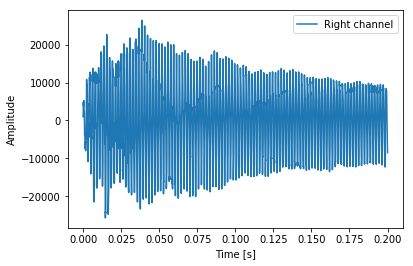

C:\Users\lhf\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


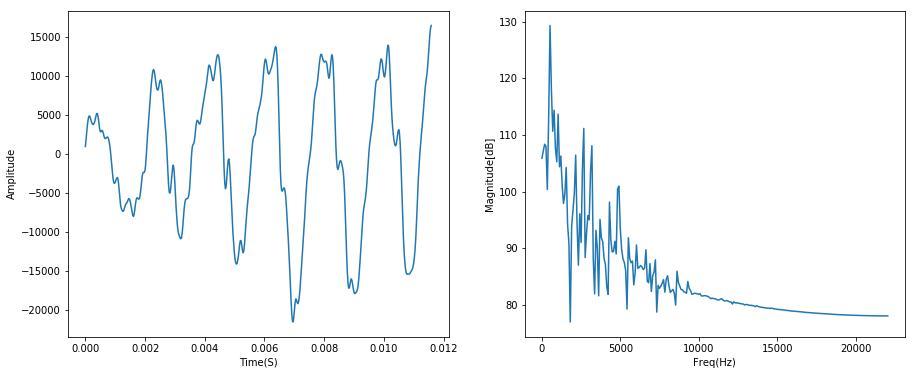

257


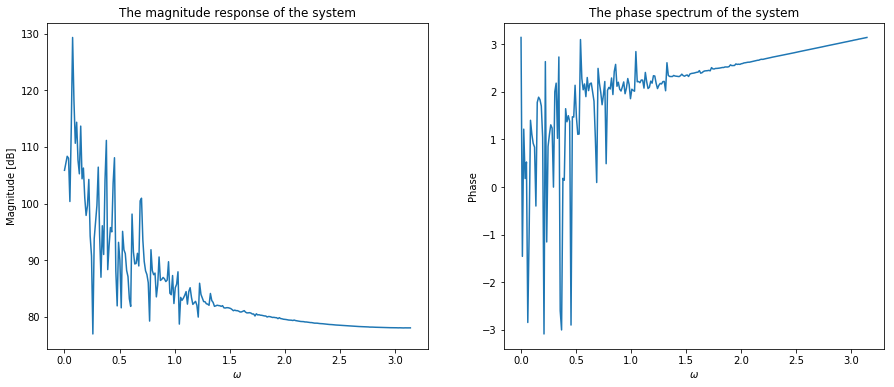

In [48]:
t_samples = DisplayWave("music.wav", 1, 12604, int(44100*0.2)+12604)
#r_samples_inv = DisplayWave("Spot1_inv_right_channel.wav", 2, 44100*3, 44100*13)
#r_samples_norm = DisplayWave("Spot1_normal_right_channel.wav", 2, 0, 44100*10)
MakeSpectrumHz(44100, 512, t_samples)
MakeSpectrumW(t_samples)

[(915.4922252971921, 525.0), (760.351732869481, 520.0), (318.87720347148536, 530.0), (256.4609785290406, 515.0), (203.14855722835125, 535.0), (172.34317071497057, 510.0), (146.1126792254312, 540.0), (108.77148989466167, 1575.0), (100.03786201530886, 1045.0), (98.85533364123646, 545.0)]


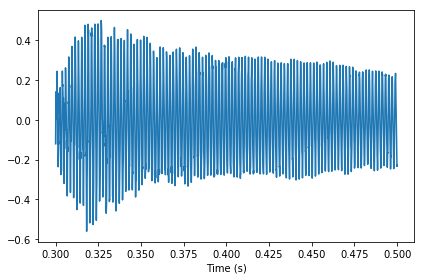

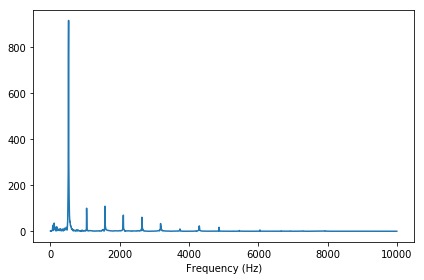

In [92]:
mt_wave = thinkdsp.read_wave("music.wav")
#mt_spectrum = mt_wave.make_spectrum()
#mt_spectrum.plot()
mt_wave_segment = mt_wave.segment(start = 0.3, duration = 0.2)
mt_wave_segment.plot()
thinkdsp.decorate(xlabel='Time (s)')
mt_spectrum_seg = mt_wave_segment.make_spectrum()
plt.figure()
mt_spectrum_seg.plot(high = 10000)
thinkdsp.decorate(xlabel='Frequency (Hz)')
print(mt_spectrum_seg.peaks()[:10])
mt_wave_segment.make_audio()

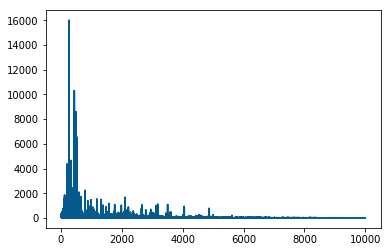

In [63]:
r_samples_inv = thinkdsp.read_wave("Spot1_inv_right_channel.wav")
spectrum = r_samples_inv.make_spectrum()
spectrum.plot(high = 10000)
spectrum.low_pass(cutoff = 8000, factor= 0.01)
spectrum.plot(color='#045a8d', high=10000)
wave = spectrum.make_wave()
wave.make_audio()

In [54]:
original_wave = thinkdsp.read_wave("Spot1_inv_right_channel.wav")
original_wave.make_audio()

In [64]:
i = 0
while t_samples[i] < 400:
    i+=1
print(i)
Audio(data = t_samples[i:i+44100], rate = 44100)
mt_samples = t_samples[i:i+44100]

0


In [144]:
i = 0
while r_samples_inv[i] < 1000:
    i+=1
print(i)
Audio(data = r_samples_inv[i:i+44100], rate = 44100)
mr_samples = r_samples_inv[i:i+44100]

161833


In [159]:
corr = np.correlate(mt_samples, mr_samples, 'valid')
print(max(corr))
H = np.fft.ifft(np.fft.fft(mr_samples)/np.fft.fft(mt_samples))

-16371


Text(0.5,1,'Channel impulse response')

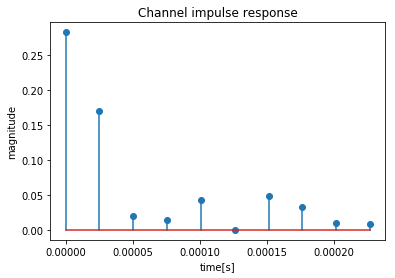

In [158]:
H = np.abs(H[:10])
time = len(H)/44100
t = np.linspace(0, time, len(H))
plt.stem(t, H)
plt.xlabel('time[s]')
plt.ylabel('magnitude')
plt.title('Channel impulse response')

(44100,)
length:1.0s
SampleRate:44100Hz


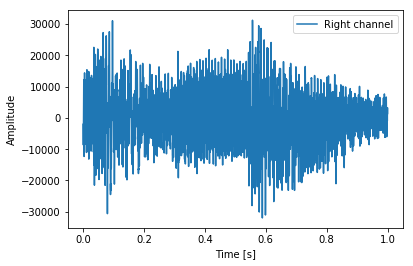

In [173]:
# Verification
test_samples = DisplayWave("music.wav", 1, 44100*2+12604, 44100*3+12604)
received = np.abs(np.fft.ifft(np.fft.fft(test_samples)*np.fft.fft(H)))
Audio(data = received, rate = 44100)

In [166]:
Audio(data = test_samples, rate = 44100)

In [168]:
Audio(data = mr_samples, rate=44100)

(611226, 2)
0.022675736961451247
44100


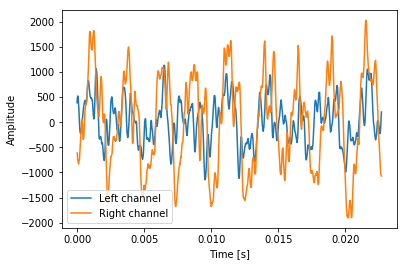

In [3]:
sampleRate, data = wavfile.read("Spot1_inv_right_channel.wav")
print(data.shape)
samples = data[44100*6:44100*6+1000,:]
length = samples.shape[0] / sampleRate
print(length)
print(sampleRate)
time = np.linspace(0., length, samples.shape[0])
plt.plot(time, samples[:, 0], label="Left channel")
plt.plot(time, samples[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()



In [6]:
# left channel
Audio(data = data[:,0], rate = sampleRate)

In [7]:
# right channel
Audio(data = data[:,1], rate = sampleRate)

(801738, 2)
0.022675736961451247
44100


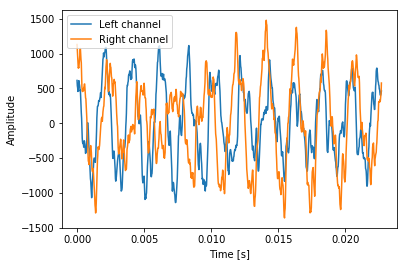

In [5]:
sampleRate, data = wavfile.read("Spot1_normal_right_channel.wav")
print(data.shape)
samples = data[44100*6:44100*6+1000,:]
length = samples.shape[0] / sampleRate
print(length)
print(sampleRate)
time = np.linspace(0., length, samples.shape[0])
plt.plot(time, samples[:, 0], label="Left channel")
plt.plot(time, samples[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

44100
(8119343, 2)
0.022675736961451247
44100


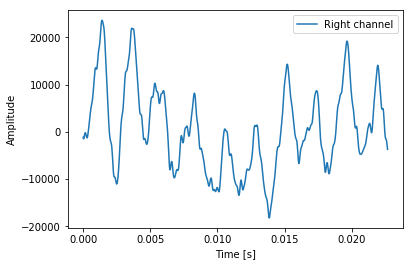

In [2]:
sampleRate, data = wavfile.read("music.wav")
print(sampleRate)
print(data.shape)
samples = data[44100*5:44100*5+1000,:]
length = samples.shape[0] / sampleRate
print(length)
print(sampleRate)
time = np.linspace(0., length, samples.shape[0])
#plt.plot(time, samples[:, 0], label="Left channel")
plt.plot(time, samples[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
Audio(data = data[:44100*10,1], rate = sampleRate)